# Homework 4 - Ishan Dane
# Github: https://github.com/idane2309

In [282]:
#Imports
import numpy as np
import torch
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

# I.

In [283]:
X=np.arange(0,31)
Y=np.array([30, 35, 33, 32, 34, 37, 39, 38, 36, 36, 37, 39, 42, 45, 45, 41,
40, 39, 42, 44, 47, 49, 50, 49, 46, 48, 50, 53, 55, 54, 53])

## i) Fit the data to a three layer feed forward neural network

In [284]:
#Feed forward 3 layer neural network
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, 10)
        self.fc2 = nn.Linear(10, 10)
        self.fc3 = nn.Linear(10, 1)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [285]:
# Prepare the data
X_train = torch.tensor(X[:20].reshape(-1, 1).astype(np.float32))
Y_train = torch.tensor(Y[:20].reshape(-1, 1).astype(np.float32))
X_test = torch.tensor(X[20:].reshape(-1, 1).astype(np.float32))
Y_test = torch.tensor(Y[20:].reshape(-1, 1).astype(np.float32))

# Create test and training dataset
train_dataset = torch.utils.data.TensorDataset(X_train, Y_train)
test_dataset = torch.utils.data.TensorDataset(X_test, Y_test)

# Create data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=1, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=1, shuffle=False)


In [286]:
#Training
net = Net()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)

num_epochs = 100

for epoch in range(num_epochs):
    for i, (X_train_tensor, Y_train_tensor) in enumerate(train_loader):
        # Forward pass
        outputs = net(X_train_tensor)
        loss = criterion(outputs, Y_train_tensor)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
            
        if (i+1) % 5 == 0:
            print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

Epoch [1/100], Loss: 3485.0613
Epoch [1/100], Loss: 2346.6074
Epoch [1/100], Loss: 2.8116
Epoch [1/100], Loss: 199.8710
Epoch [2/100], Loss: 114.2191
Epoch [2/100], Loss: 291.4669
Epoch [2/100], Loss: 368.3041
Epoch [2/100], Loss: 135.3876
Epoch [3/100], Loss: 38.8988
Epoch [3/100], Loss: 2.9697
Epoch [3/100], Loss: 171.7517
Epoch [3/100], Loss: 1.5367
Epoch [4/100], Loss: 0.1269
Epoch [4/100], Loss: 151.8457
Epoch [4/100], Loss: 367.8497
Epoch [4/100], Loss: 211.2414
Epoch [5/100], Loss: 4.1450
Epoch [5/100], Loss: 10.7032
Epoch [5/100], Loss: 342.4720
Epoch [5/100], Loss: 111.5499
Epoch [6/100], Loss: 167.2626
Epoch [6/100], Loss: 146.2502
Epoch [6/100], Loss: 49.4545
Epoch [6/100], Loss: 4.1350
Epoch [7/100], Loss: 114.9116
Epoch [7/100], Loss: 33.6576
Epoch [7/100], Loss: 206.8367
Epoch [7/100], Loss: 0.0689
Epoch [8/100], Loss: 3.3581
Epoch [8/100], Loss: 11.0095
Epoch [8/100], Loss: 427.8244
Epoch [8/100], Loss: 252.4720
Epoch [9/100], Loss: 38.5837
Epoch [9/100], Loss: 140.8656


In [287]:

# Testing the neural network
with torch.no_grad():
    total = 0
    for X_test_tensor, Y_test_tensor in test_loader:
        outputs = net(X_test_tensor)
        mse_loss = criterion(outputs, Y_test_tensor)
        total += mse_loss.item()
    print('MSE Loss on test data: {}'.format(total/len(test_loader)))
   
    


MSE Loss on test data: 186.97961148348722


## iii) Use the first 10 and last 10 data points as training data. Then fit the model to the test data

In [288]:
#Train and Test Sets, First 10 and Last 10 (Train), Middle 10 (Test)
X2_train = torch.tensor(np.concatenate((X[:10], X[20:])).reshape(-1, 1).astype(np.float32))
Y2_train = torch.tensor(np.concatenate((Y[:10], Y[20:])).reshape(-1, 1).astype(np.float32))
X2_test = torch.tensor(X[10:20].reshape(-1, 1).astype(np.float32))
Y2_test = torch.tensor(Y[10:20].reshape(-1, 1).astype(np.float32))

# Create test and training dataset
train_dataset2 = torch.utils.data.TensorDataset(X2_train, Y2_train)
test_dataset2 = torch.utils.data.TensorDataset(X2_test, Y2_test)

# Create data loader
train_loader2 = torch.utils.data.DataLoader(dataset=train_dataset2, batch_size=1, shuffle=True)
test_loader2 = torch.utils.data.DataLoader(dataset=test_dataset2, batch_size=1, shuffle=False)


In [289]:
#Training

net = Net()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)

num_epochs = 100

for epoch in range(num_epochs):
    for i, (X_train_tensor, Y_train_tensor) in enumerate(train_loader2):
        # Forward pass
        outputs = net(X_train_tensor)
        loss = criterion(outputs, Y_train_tensor)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
            
        if (i+1) % 5 == 0:
            print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

Epoch [1/100], Loss: 2771.6948
Epoch [1/100], Loss: 748.9750
Epoch [1/100], Loss: 669.4347
Epoch [1/100], Loss: 1491.4309
Epoch [2/100], Loss: 314.7719
Epoch [2/100], Loss: 952.7590
Epoch [2/100], Loss: 237.8571
Epoch [2/100], Loss: 987.9167
Epoch [3/100], Loss: 537.4782
Epoch [3/100], Loss: 823.0120
Epoch [3/100], Loss: 629.6324
Epoch [3/100], Loss: 270.3845
Epoch [4/100], Loss: 28.3373
Epoch [4/100], Loss: 437.9052
Epoch [4/100], Loss: 5.4860
Epoch [4/100], Loss: 209.3532
Epoch [5/100], Loss: 142.3631
Epoch [5/100], Loss: 19.5838
Epoch [5/100], Loss: 16.2402
Epoch [5/100], Loss: 1.8760
Epoch [6/100], Loss: 70.3811
Epoch [6/100], Loss: 14.6159
Epoch [6/100], Loss: 1.1950
Epoch [6/100], Loss: 54.5773
Epoch [7/100], Loss: 5.7004
Epoch [7/100], Loss: 17.3471
Epoch [7/100], Loss: 60.3003
Epoch [7/100], Loss: 115.9523
Epoch [8/100], Loss: 198.2097
Epoch [8/100], Loss: 57.1521
Epoch [8/100], Loss: 9.7196
Epoch [8/100], Loss: 56.9716
Epoch [9/100], Loss: 12.1971
Epoch [9/100], Loss: 77.2938


In [290]:
# Testing the neural network
with torch.no_grad():
    total = 0
    for X_test_tensor, Y_test_tensor in test_loader2:
        outputs = net(X_test_tensor)
        mse_loss = criterion(outputs, Y_test_tensor)
        total += mse_loss.item()
    print('MSE Loss on test data: {}'.format(total/len(test_loader2)))

MSE Loss on test data: 8.99846659898758


# II. Train a feedforward neural network on the MNIST data set. You will start byperforming the following analysis:

In [291]:
#Load MNIST dataset
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, cache=True)
X = mnist.data[:10000] / 255.0 # 10000 samples, 784 features
Y = mnist.target[:10000] # 10000 Labels


/Users/idane/Documents/EE399A/.venv/lib/python3.11/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


## i) Compute the first 20 PCA modes of the digit images.

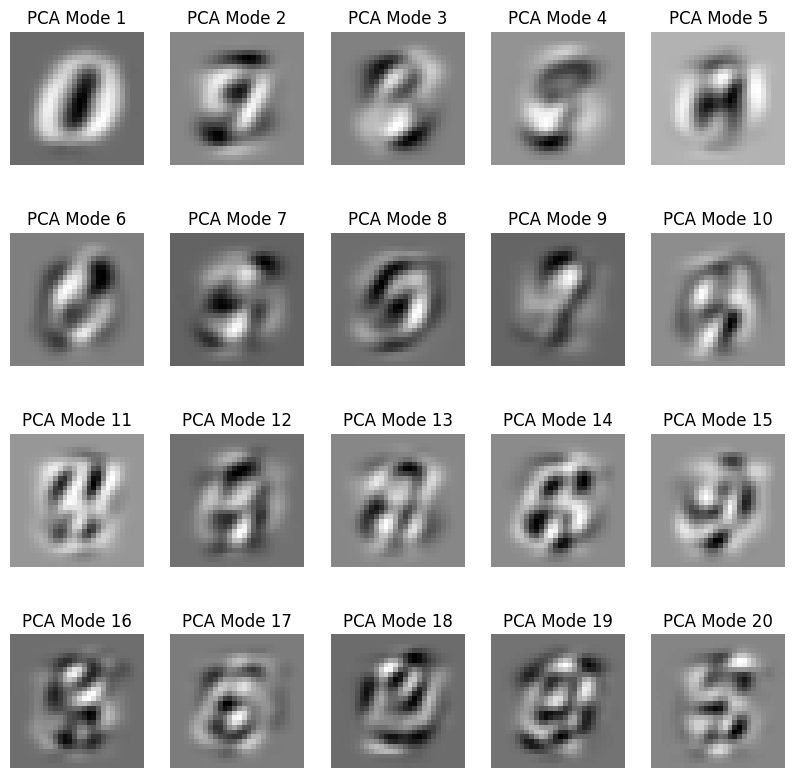

In [292]:
#First 20 PCA modes of the digit images
from sklearn.decomposition import PCA

pca = PCA(n_components=20)
pca.fit(X)
X_pca = pca.transform(X)

#Plot the first 20 PCA modes of the digit images
fig, axs = plt.subplots(4, 5, figsize=(10, 10))
for i in range(4):
    for j in range(5):
        axs[i,j].imshow(pca.components_[i*5+j].reshape(28, 28), cmap='gray')
        axs[i,j].axis('off')
        axs[i,j].set_title('PCA Mode {}'.format(i*5+j+1))
plt.show()



# ii) Build a feed-forward neural network to classify the digits

In [293]:
# Load the MNIST dataset and apply transformations
train_dataset = datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

# Create data loaders
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

In [294]:
# 3 layer Feed Forward Neural Network to classify digits
class Net2(nn.Module):
    def __init__(self):
        super(Net2, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 784) # Flatten the data (n, 1, 28, 28) --> (n, 784)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x) 
        return x

In [295]:
# Initialize the network and define the loss function and optimizer
net = Net2()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)

# Train the network
num_epochs = 10
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = net(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, i+1, len(train_loader), loss.item()))

# Test the network
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
    print('Accuracy of the network on the test images: {} %'.format(100 * correct / total))


Epoch [1/10], Step [100/938], Loss: 2.2577
Epoch [1/10], Step [200/938], Loss: 2.1900
Epoch [1/10], Step [300/938], Loss: 2.1176
Epoch [1/10], Step [400/938], Loss: 2.0554
Epoch [1/10], Step [500/938], Loss: 1.8789
Epoch [1/10], Step [600/938], Loss: 1.5814
Epoch [1/10], Step [700/938], Loss: 1.2978
Epoch [1/10], Step [800/938], Loss: 1.2189
Epoch [1/10], Step [900/938], Loss: 1.0185
Epoch [2/10], Step [100/938], Loss: 0.8117
Epoch [2/10], Step [200/938], Loss: 0.6496
Epoch [2/10], Step [300/938], Loss: 0.6726
Epoch [2/10], Step [400/938], Loss: 0.6516
Epoch [2/10], Step [500/938], Loss: 0.6229
Epoch [2/10], Step [600/938], Loss: 0.6593
Epoch [2/10], Step [700/938], Loss: 0.4781
Epoch [2/10], Step [800/938], Loss: 0.3906
Epoch [2/10], Step [900/938], Loss: 0.4090
Epoch [3/10], Step [100/938], Loss: 0.6469
Epoch [3/10], Step [200/938], Loss: 0.6471
Epoch [3/10], Step [300/938], Loss: 0.4273
Epoch [3/10], Step [400/938], Loss: 0.6328
Epoch [3/10], Step [500/938], Loss: 0.5058
Epoch [3/10

In [296]:
# Split the data into training and testing sets
X3_train, X3_test, Y3_train, Y3_test = train_test_split(mnist.data, mnist.target, test_size=0.2, random_state=42)


In [297]:
#SVM Classifier
svm_clf = SVC()
svm_clf.fit(X3_train, Y3_train)

y_pred = svm_clf.predict(X3_test)

print("SVM Accuracy: ", accuracy_score(Y3_test, y_pred))

SVM Accuracy:  0.9764285714285714


In [298]:
# Decision Tree Classifier
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X3_train, Y3_train)

y_pred = tree_clf.predict(X3_test)

print("Decision Tree Accuracy: ", accuracy_score(Y3_test, y_pred))


Decision Tree Accuracy:  0.8703571428571428


In [299]:
# LSTM Classifier
# Set device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Define the LSTM network
class LSTMNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMNet, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])  # Extract the last output step and pass it through the fully connected layer
        return out

In [300]:
# Use LSTM to classify digits
# Define hyperparameters
input_size = 28
hidden_size = 128
num_layers = 2
num_classes = 10
batch_size = 64
num_epochs = 10
learning_rate = 0.01

# Initialize the LSTM model
model = LSTMNet(input_size, hidden_size, num_layers, num_classes).to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Training loop
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28, 28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_step}], Loss: {loss.item():.4f}")
            

Epoch [1/10], Step [100/938], Loss: 2.2996
Epoch [1/10], Step [200/938], Loss: 2.3074
Epoch [1/10], Step [300/938], Loss: 2.3055
Epoch [1/10], Step [400/938], Loss: 2.3007
Epoch [1/10], Step [500/938], Loss: 2.3055
Epoch [1/10], Step [600/938], Loss: 2.3032
Epoch [1/10], Step [700/938], Loss: 2.3046
Epoch [1/10], Step [800/938], Loss: 2.3103
Epoch [1/10], Step [900/938], Loss: 2.3012
Epoch [2/10], Step [100/938], Loss: 2.3040
Epoch [2/10], Step [200/938], Loss: 2.3051
Epoch [2/10], Step [300/938], Loss: 2.2918
Epoch [2/10], Step [400/938], Loss: 2.2935
Epoch [2/10], Step [500/938], Loss: 2.3049
Epoch [2/10], Step [600/938], Loss: 2.2948
Epoch [2/10], Step [700/938], Loss: 2.3010
Epoch [2/10], Step [800/938], Loss: 2.2999
Epoch [2/10], Step [900/938], Loss: 2.3054
Epoch [3/10], Step [100/938], Loss: 2.2923
Epoch [3/10], Step [200/938], Loss: 2.3018
Epoch [3/10], Step [300/938], Loss: 2.3000
Epoch [3/10], Step [400/938], Loss: 2.3078
Epoch [3/10], Step [500/938], Loss: 2.3009
Epoch [3/10

In [302]:
# Test LSTM Classifier
# Evaluation on test set
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28, 28).to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    accuracy = 100 * correct / total
    print(f"Accuracy on the test set: {accuracy:.2f}%.")

Accuracy on the test set: 23.28%.
